In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [54]:
dataset = pd.read_csv('../data/ml/dataset_ml.csv')

In [45]:
# Función para entrenar y evaluar modelos
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Resultados para {model.__class__.__name__}:")
    print(f"RMSE: {rmse:.2f}%")
    print(f"MSE: {mse:.2f}%")
    print(f"MAE: {mae:.2f}%")
    print(f"R^2: {r2:.4f}%")
    print("\n")
    return y_pred

In [56]:
y = dataset['total_cost']
year_month = dataset['year_month']
X = dataset.drop(['user_id', 'first_name', 'last_name', 'year_month', 'total_cost'], axis=1)
print(X.columns)
# 2. Dividir el conjunto de datos en entrenamiento y prueba, incluyendo 'year_month'
X_train, X_test, y_train, y_test, year_month_train, year_month_test = train_test_split(X, y, year_month, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lin_reg = LinearRegression()
y_pred_lr = train_and_evaluate(lin_reg, X_train_scaled, X_test_scaled, y_train, y_test)

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
y_pred_sgd = train_and_evaluate(sgd_reg, X_train_scaled, X_test_scaled, y_train, y_test)

ridge_reg = Ridge(alpha=1.0)
y_pred_ridge = train_and_evaluate(ridge_reg, X_train_scaled, X_test_scaled, y_train, y_test)

lasso_reg = Lasso(alpha=0.1)
y_pred_lasso = train_and_evaluate(lasso_reg, X_train_scaled, X_test_scaled, y_train, y_test)



Index(['total_calls', 'avg_duration', 'sessions_count', 'usd_monthly_pay',
       'is_churned', 'minutes_usage_ratio', 'messages_usage_ratio',
       'mb_usage_ratio', 'plan_surf', 'plan_ultimate', 'calls_per_session',
       'mb_per_session', 'messages_per_session', 'age_<18', 'age_18-25',
       'age_26-35', 'age_36-50', 'age_50+', 'lag1_total_cost'],
      dtype='object')
Resultados para LinearRegression:
RMSE: 20.88%
MSE: 435.83%
MAE: 14.97%
R^2: 0.7366%


Resultados para SGDRegressor:
RMSE: 20.58%
MSE: 423.49%
MAE: 14.83%
R^2: 0.7440%


Resultados para Ridge:
RMSE: 20.81%
MSE: 433.23%
MAE: 14.95%
R^2: 0.7381%


Resultados para Lasso:
RMSE: 20.60%
MSE: 424.22%
MAE: 14.91%
R^2: 0.7436%




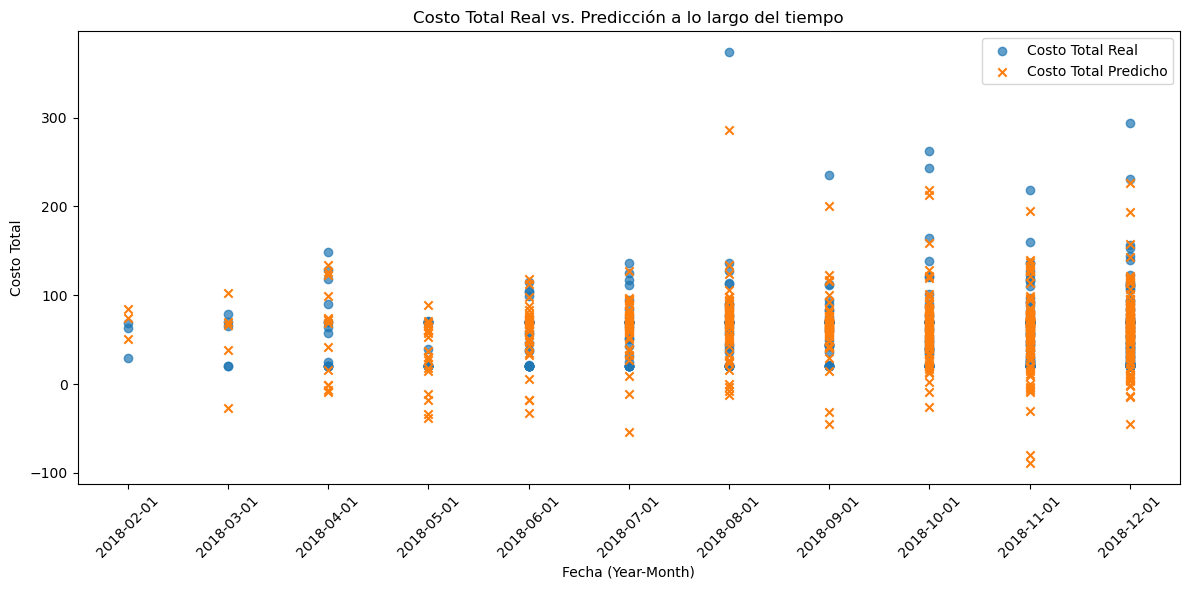

In [57]:
y_pred = y_pred_sgd
# Crear un DataFrame con year_month, y_test y y_pred
results_df = pd.DataFrame({
    'year_month': year_month_test,
    'Costo Total Real': y_test,
    'Costo Total Predicho': y_pred
})

results_df = results_df.sort_values('year_month')

plt.figure(figsize=(12, 6))
plt.scatter(results_df['year_month'], results_df['Costo Total Real'], label='Costo Total Real', alpha=0.7)
plt.scatter(results_df['year_month'], results_df['Costo Total Predicho'], label='Costo Total Predicho', marker='x')
plt.xlabel('Fecha (Year-Month)')
plt.ylabel('Costo Total')
plt.title('Costo Total Real vs. Predicción a lo largo del tiempo')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()